Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

#### Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

###Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [112]:
# basic libraries to work on the dataframe
import pandas as pd
import numpy as np
# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

In [2]:
lead_data = pd.read_csv('Leads.csv')

In [3]:
lead_data.shape, lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

((9240, 37), None)

In [4]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [5]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

## EDA

### Data cleaning 

#### Observations
    1) Prospect ID and Lead Number both are both unique identifiers. which don't server any purpose in data analysis, hence we can drop these columns.
    2) The Column 'Tags' is the one filled by Sales team for their reference, as per business it has no relevance to the outcome i.e lead conversion, hence droping this as well.
    3) Also Columns filled by sales team are 'Last Activity', 'Last notable Activity' and 'lead quality' are also okay to drop.
    4) There few columns like 'Specialization', 'source' that contains values as 'Select', looks like its drop down to collect data and not mandatory fields, so we can convert these 'Select' words to NULL

In [6]:
# droping prospect id and lead number column
columns_to_drop = ['Prospect ID', 'Lead Number', 'Tags', 'Last Activity', 'Lead Quality', 
                    'Last Notable Activity']
lead_data.drop(columns_to_drop, axis = 1, inplace = True)

In [7]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No
1,API,Organic Search,No,No,0,5.00,674,2.50,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No


Renaming some columns for better readbility


In [8]:
# What matters most to you in choosing a course -> course_selection_reason
# How did you hear about X Education -> source
# Total Time Spent on Website -> time_on_website
# What is your current occupation -> occupation
# Receive More Updates About Our Courses -> courses_updates
# Update me on Supply Chain Content -> supply_chain_content_updates
# Get updates on DM Content -> dm_content_updates
# I agree to pay the amount through cheque -> cheque_payment
# A free copy of Mastering The Interview -> mastering_interview

# shorten column names
lead_data.rename(columns = {'Total Time Spent on Website': 'time_on_website', 
                    'How did you hear about X Education': 'source', 
                     'What is your current occupation': 'occupation',
                    'What matters most to you in choosing a course' : 'course_selection_reason', 
                    'Receive More Updates About Our Courses': 'courses_updates', 
                     'Update me on Supply Chain Content': 'supply_chain_content_updates',
                    'Get updates on DM Content': 'dm_content_updates',
                    'I agree to pay the amount through cheque': 'cheque_payment',
                    'A free copy of Mastering The Interview': 'mastering_interview'}, inplace = True)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,source,occupation,course_selection_reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,cheque_payment,mastering_interview
0,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No
1,API,Organic Search,No,No,0,5.00,674,2.50,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No


In [9]:
# columns having select word as values
lead_data_obj = lead_data.select_dtypes(include='object')
s = lambda x: x.str.contains('Select', na=False)
l = lead_data_obj.columns[lead_data_obj.apply(s).any()].tolist()
print (l)

['Specialization', 'source', 'Lead Profile', 'City']


In [10]:
# lets convert 'Select' word in null for these columns
lead_data[l] = lead_data[l].replace('Select', np.nan)

In [11]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,source,occupation,course_selection_reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,cheque_payment,mastering_interview
0,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No
1,API,Organic Search,No,No,0,5.00,674,2.50,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,Mumbai,02.Medium,01.High,15.00,18.00,No,No


In [12]:
# Lets check the null values
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
time_on_website                 0.00
Page Views Per Visit            1.48
Country                        26.63
Specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
Lead Profile                   74.19
City                           39.71
Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
A

In [13]:
more_null_cols = lead_data.columns[round(100*(lead_data.isnull().sum())/len(lead_data.index),2)>45]

In [14]:
more_null_cols

Index(['source', 'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
lead_data['source'].value_counts(normalize = True, dropna = False)*100

NaN                     78.46
Online Search            8.74
Word Of Mouth            3.77
Student of SomeSchool    3.35
Other                    2.01
Multiple Sources         1.65
Advertisements           0.76
Social Media             0.73
Email                    0.28
SMS                      0.25
Name: source, dtype: float64

In [16]:
lead_data['Asymmetrique Activity Index'].value_counts(normalize = True, dropna = False)*100

NaN         45.65
02.Medium   41.55
01.High      8.89
03.Low       3.92
Name: Asymmetrique Activity Index, dtype: float64

In [17]:
lead_data['Asymmetrique Profile Index'].value_counts(normalize = True, dropna = False)*100

NaN         45.65
02.Medium   30.17
01.High     23.84
03.Low       0.34
Name: Asymmetrique Profile Index, dtype: float64

In [18]:
lead_data['Asymmetrique Activity Score'].value_counts(normalize = True, dropna = False)*100

NaN     45.65
14.00   19.17
15.00   13.99
13.00    8.39
16.00    5.05
17.00    3.78
12.00    2.12
11.00    1.03
10.00    0.62
9.00     0.10
18.00    0.05
8.00     0.04
7.00     0.01
Name: Asymmetrique Activity Score, dtype: float64

In [19]:
lead_data['Asymmetrique Profile Score'].value_counts(normalize = True, dropna = False)*100

NaN     45.65
15.00   19.04
18.00   11.59
16.00    6.48
17.00    6.27
20.00    3.33
19.00    2.65
14.00    2.45
13.00    2.21
12.00    0.24
11.00    0.10
Name: Asymmetrique Profile Score, dtype: float64

### Observations
    Data in above mentioned columns are mostly null
    The Non-Null data in the above columns are skewed
    So lets drop these columns

In [20]:
lead_data.drop(more_null_cols, axis=1, inplace=True)

In [21]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,City,cheque_payment,mastering_interview
0,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.00,674,2.50,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [22]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
time_on_website                 0.00
Page Views Per Visit            1.48
Country                        26.63
Specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
City                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [23]:
# Now lets see what do we have in columns where NULL values are more
# these columns are
#  Country
#  Specialization
#  What is your current occupation
#  What matters most to you in choosing a course
#  Tags
#  City

# Since City and Country are related fields lets see if Country can be drived from City

lead_data['Country'].value_counts(normalize = True, dropna = False)*100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [24]:
lead_data['City'].value_counts(normalize = True, dropna = False)*100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: City, dtype: float64

In [25]:
lead_data[lead_data['Country'].isna()]['City'].value_counts(normalize = True, dropna = False)*100

NaN                           83.50
Mumbai                         8.57
Thane & Outskirts              3.25
Other Cities                   2.23
Other Cities of Maharashtra    1.75
Other Metro Cities             0.61
Tier II Cities                 0.08
Name: City, dtype: float64

#### We can impute Country= India for cities
    Mumbai
    Thane & Outskirts
    Other Cities of Maharashtra

In [26]:
city=['Mumbai', 'Thane & Outskirts','Other Cities of Maharashtra']
#lead_data['Country'] = lead_data.apply(lambda x: 'India' if lead_data['City'] in city else lead_data['Country'], axis=1).any()
lead_data['Country'] = np.where(lead_data['City']=='Mumbai', 'India', lead_data['Country'])
lead_data['Country'] = np.where(lead_data['City']=='Thane & Outskirts', 'India', lead_data['Country'])
lead_data['Country'] = np.where(lead_data['City']=='Other Cities of Maharashtra', 'India', lead_data['Country'])

In [27]:
lead_data['Country'].value_counts(normalize = True, dropna = False)*100

India                  75.36
NaN                    23.02
United Arab Emirates    0.35
United States           0.31
Singapore               0.14
Saudi Arabia            0.12
unknown                 0.05
United Kingdom          0.05
Qatar                   0.05
France                  0.04
South Africa            0.04
Oman                    0.04
Nigeria                 0.04
Australia               0.04
Hong Kong               0.03
Bahrain                 0.03
Sweden                  0.02
Ghana                   0.02
Bangladesh              0.02
Asia/Pacific Region     0.02
Uganda                  0.02
Kuwait                  0.02
Italy                   0.02
Sri Lanka               0.01
Liberia                 0.01
Philippines             0.01
Denmark                 0.01
Kenya                   0.01
Russia                  0.01
Tanzania                0.01
Canada                  0.01
Germany                 0.01
China                   0.01
Name: Country, dtype: float64

#### There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NULL values with 'NA'. 

In [28]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
time_on_website                 0.00
Page Views Per Visit            1.48
Country                        23.02
Specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
Search                          0.00
Magazine                        0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
City                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

In [45]:
lead_data['Specialization'].value_counts(normalize = True, dropna = False)

Operations Management               0.42
Finance Management                  0.11
Human Resource Management           0.09
Marketing Management                0.09
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Travel and Tourism                  0.02
Media and Advertising               0.02
International Business              0.02
Healthcare Management               0.02
Hospitality Management              0.01
E-COMMERCE                          0.01
Retail Management                   0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

In [46]:
lead_data['course_selection_reason'].value_counts(normalize = True, dropna = False)

Better Career Prospects     1.00
Flexibility & Convenience   0.00
Other                       0.00
Name: course_selection_reason, dtype: float64

In [47]:
lead_data['occupation'].value_counts(normalize = True, dropna = False)

Unemployed             0.90
Working Professional   0.08
Student                0.02
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: occupation, dtype: float64

#### Let's impute the missing data with the available data, 
    For columns 'Specialization', 'course_selection_reason', 'occupation',  since all genuine data are well distributed across the records, let's impute the missing value proportionately
    For Columns 'City' and 'Country' the majority of data is of 'Mumbai' and 'India' repectivily, so lets use mode() method to impute the data

In [36]:
lead_data['City'].fillna('Mumbai', inplace=True)
lead_data['Country'].fillna('India', inplace=True)

In [44]:
import random
lead_data['Specialization'].fillna(random.choice(lead_data['Specialization'][lead_data['Specialization'].notna()]), inplace=True)
lead_data['course_selection_reason'].fillna(random.choice(lead_data['course_selection_reason'][lead_data['course_selection_reason'].notna()]), inplace=True)
lead_data['occupation'].fillna(random.choice(lead_data['occupation'][lead_data['occupation'].notna()]), inplace=True)

In [48]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                    0.00
Lead Source                    0.39
Do Not Email                   0.00
Do Not Call                    0.00
Converted                      0.00
TotalVisits                    1.48
time_on_website                0.00
Page Views Per Visit           1.48
Country                        0.00
Specialization                 0.00
occupation                     0.00
course_selection_reason        0.00
Search                         0.00
Magazine                       0.00
Newspaper Article              0.00
X Education Forums             0.00
Newspaper                      0.00
Digital Advertisement          0.00
Through Recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
City                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [49]:
lead_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

In [50]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0], inplace=True)

In [51]:
# the google and Google are some so combining them 
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')

In [52]:
lead_data['Lead Source'].value_counts(normalize = True, dropna = False)*100

Google              31.48
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
bing                 0.06
Click2call           0.04
Social Media         0.02
Live Chat            0.02
Press_Release        0.02
Pay per Click Ads    0.01
blog                 0.01
WeLearn              0.01
welearnblog_Home     0.01
youtubechannel       0.01
testone              0.01
NC_EDM               0.01
Name: Lead Source, dtype: float64

#### Handling Numerical columns

In [53]:
print(lead_data['TotalVisits'].describe())
print(lead_data['Page Views Per Visit'].describe())


count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64
count   9103.00
mean       2.36
std        2.16
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       55.00
Name: Page Views Per Visit, dtype: float64


In [54]:
# filling null values with its median values
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(), inplace=True)
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(), inplace=True)

In [55]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                    0.00
Lead Source                    0.00
Do Not Email                   0.00
Do Not Call                    0.00
Converted                      0.00
TotalVisits                    0.00
time_on_website                0.00
Page Views Per Visit           0.00
Country                        0.00
Specialization                 0.00
occupation                     0.00
course_selection_reason        0.00
Search                         0.00
Magazine                       0.00
Newspaper Article              0.00
X Education Forums             0.00
Newspaper                      0.00
Digital Advertisement          0.00
Through Recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
City                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

Data Cleaning is done here. Let's start analyzing the data one-by-one

### Catagorical data analysis

In [56]:
# Lead Origin 
lead_data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [57]:
lead_data['Specialization'].value_counts(normalize = True, dropna = False)

Operations Management               0.42
Finance Management                  0.11
Human Resource Management           0.09
Marketing Management                0.09
Business Administration             0.04
IT Projects Management              0.04
Supply Chain Management             0.04
Banking, Investment And Insurance   0.04
Travel and Tourism                  0.02
Media and Advertising               0.02
International Business              0.02
Healthcare Management               0.02
Hospitality Management              0.01
E-COMMERCE                          0.01
Retail Management                   0.01
Rural and Agribusiness              0.01
E-Business                          0.01
Services Excellence                 0.00
Name: Specialization, dtype: float64

In [58]:
lead_data['course_selection_reason'].value_counts(normalize = True, dropna = False)

Better Career Prospects     1.00
Flexibility & Convenience   0.00
Other                       0.00
Name: course_selection_reason, dtype: float64

In [59]:
lead_data['occupation'].value_counts(normalize = True, dropna = False)

Unemployed             0.90
Working Professional   0.08
Student                0.02
Other                  0.00
Housewife              0.00
Businessman            0.00
Name: occupation, dtype: float64

### Lets find out if we have any Binary data columns

In [60]:
for k, v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 5
Lead Source = 20
Do Not Email = 2
Do Not Call = 2
Country = 32
Specialization = 18
occupation = 6
course_selection_reason = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
City = 6
cheque_payment = 1
mastering_interview = 2


In [61]:
lead_data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

##### There are few columns with only one unique values
    Magazine
    courses_updates
    supply_chain_content_updates
    dm_content_updates
    cheque_payment

Let's check these columns


In [62]:
single_val_cols = ['Magazine', 'courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

# see value counts for each of the columns
for i in single_val_cols:
    x = (lead_data[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No   100.00
Name: Magazine, dtype: float64

No   100.00
Name: courses_updates, dtype: float64

No   100.00
Name: supply_chain_content_updates, dtype: float64

No   100.00
Name: dm_content_updates, dtype: float64

No   100.00
Name: cheque_payment, dtype: float64



#### Observation:
    Since above mentioned columns has only ONE value, hence these doesn't contain any relevance. So droping them from the dataset

In [63]:
lead_data.drop(single_val_cols, axis=1, inplace=True)

In [64]:
for k, v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 5
Lead Source = 20
Do Not Email = 2
Do Not Call = 2
Country = 32
Specialization = 18
occupation = 6
course_selection_reason = 3
Search = 2
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
City = 6
mastering_interview = 2


#### There are few columns with 2 unique values, and looks like these are binary columns so let's check them out

In [65]:
bin_cols=['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
         'Newspaper', 'Digital Advertisement', 'mastering_interview', 'Through Recommendations']
# see value counts for each of the columns
for i in bin_cols:
    x = (lead_data[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: Do Not Email, dtype: float64

No    99.98
Yes    0.02
Name: Do Not Call, dtype: float64

No    99.85
Yes    0.15
Name: Search, dtype: float64

No    99.98
Yes    0.02
Name: Newspaper Article, dtype: float64

No    99.99
Yes    0.01
Name: X Education Forums, dtype: float64

No    99.99
Yes    0.01
Name: Newspaper, dtype: float64

No    99.96
Yes    0.04
Name: Digital Advertisement, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64

No    99.92
Yes    0.08
Name: Through Recommendations, dtype: float64



### Observation:
    These are binary data columns, having only 'Yes' and 'No' as values
    These columns shows DATA IMBALANCE, as almost all records have same value
    Because of heavy data imbalance, we can drop the following columns as well
    * we are not droping mastering_interview column as doesn't show data imbalane
    * we are not droping 'Do Not Email' column as well as its has some data

In [66]:
bin_cols_to_delete=['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
         'Newspaper', 'Digital Advertisement', 'Through Recommendations']
lead_data.drop(bin_cols_to_delete, axis=1, inplace=True)

In [67]:
for k, v in lead_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Lead Origin = 5
Lead Source = 20
Do Not Email = 2
Country = 32
Specialization = 18
occupation = 6
course_selection_reason = 3
City = 6
mastering_interview = 2


In [68]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,City,mastering_interview
0,API,Olark Chat,No,0,0.00,0,0.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
1,API,Organic Search,No,0,5.00,674,2.50,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No


### Uni-variate Analysis

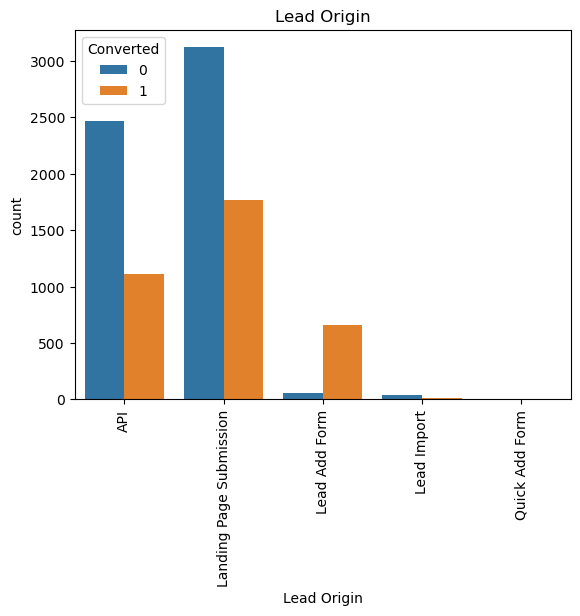

In [69]:
s1=sns.countplot(lead_data['Lead Origin'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Lead Origin')
plt.show()

Text(0.5, 1.0, 'Lead Source')

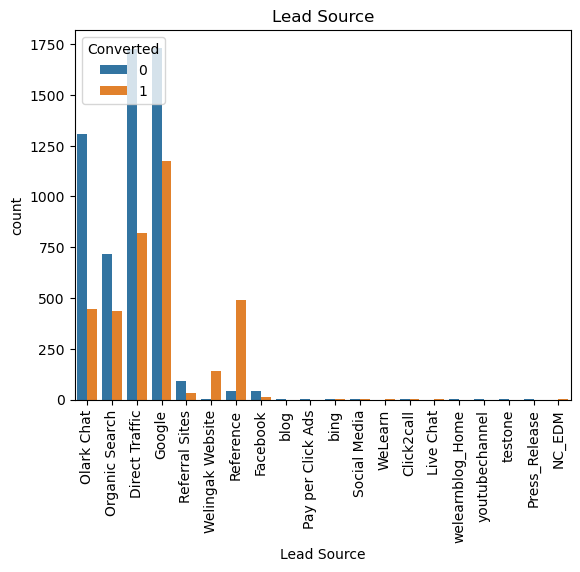

In [70]:
s1=sns.countplot(lead_data['Lead Source'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Lead Source')

Text(0.5, 1.0, 'Country')

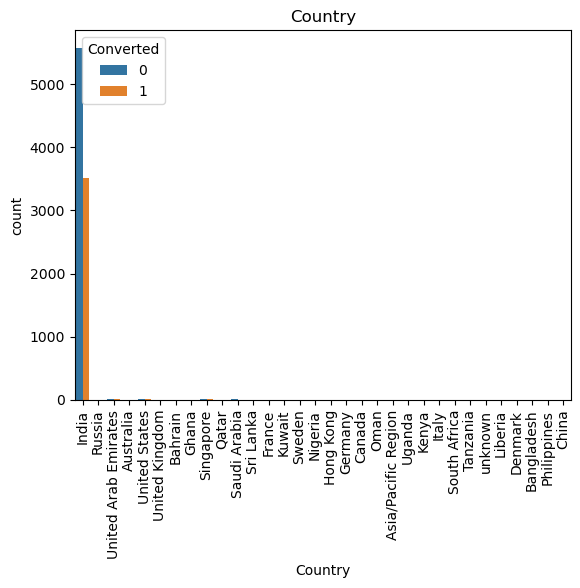

In [71]:
s1=sns.countplot(lead_data['Country'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Country')

Text(0.5, 1.0, 'City')

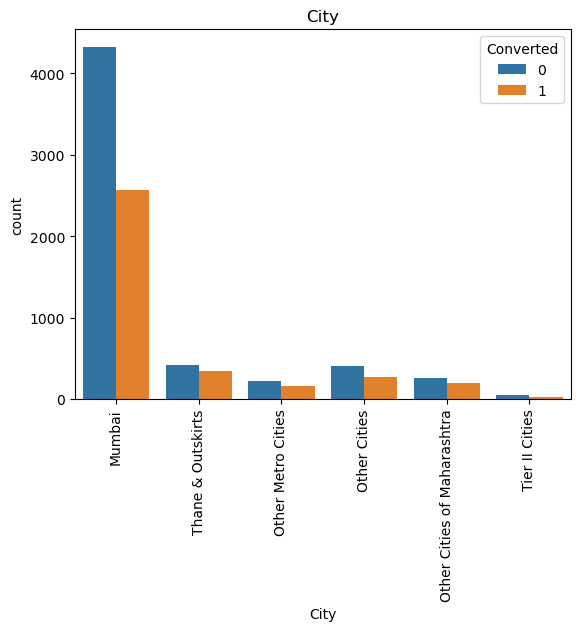

In [72]:
s1=sns.countplot(lead_data['City'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('City')

Text(0.5, 1.0, 'Specialization')

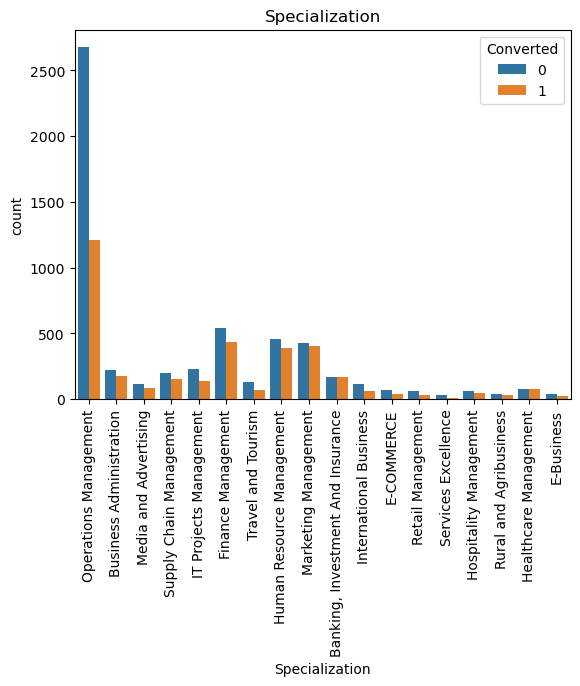

In [73]:
s1=sns.countplot(lead_data['Specialization'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('Specialization')

Text(0.5, 1.0, 'occupation')

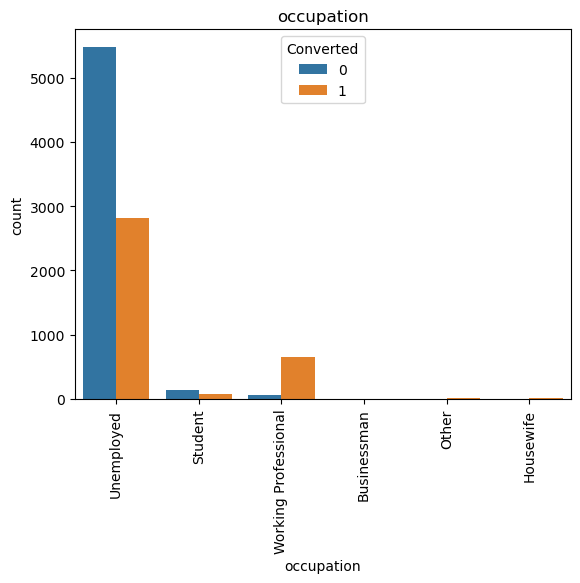

In [74]:
s1=sns.countplot(lead_data['occupation'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('occupation')

Text(0.5, 1.0, 'course_selection_reason')

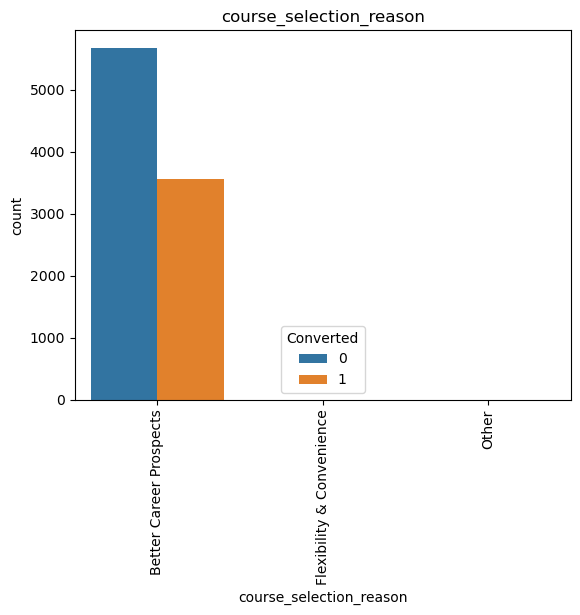

In [75]:
s1=sns.countplot(lead_data['course_selection_reason'], hue=lead_data['Converted'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.title('course_selection_reason')

### Observations:
    1) Landing Page Submissing is good lead Origin, it has better chance of Conversion incompare to others
    2) Online Search engines are good lead source, it has 90% of traffic
    3) Data mostly belongs to India and in that predominatly from Mumbai City
    4) The 'Management' category of cource are most popular, it has more then 70% leads
    5) The 'Unemployeed' seaction has most of the enquiries
    6) People going fo course for 'Better carrier choise'

### Numrical data Analysis

In [76]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,City,mastering_interview
0,API,Olark Chat,No,0,0.00,0,0.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
1,API,Organic Search,No,0,5.00,674,2.50,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No


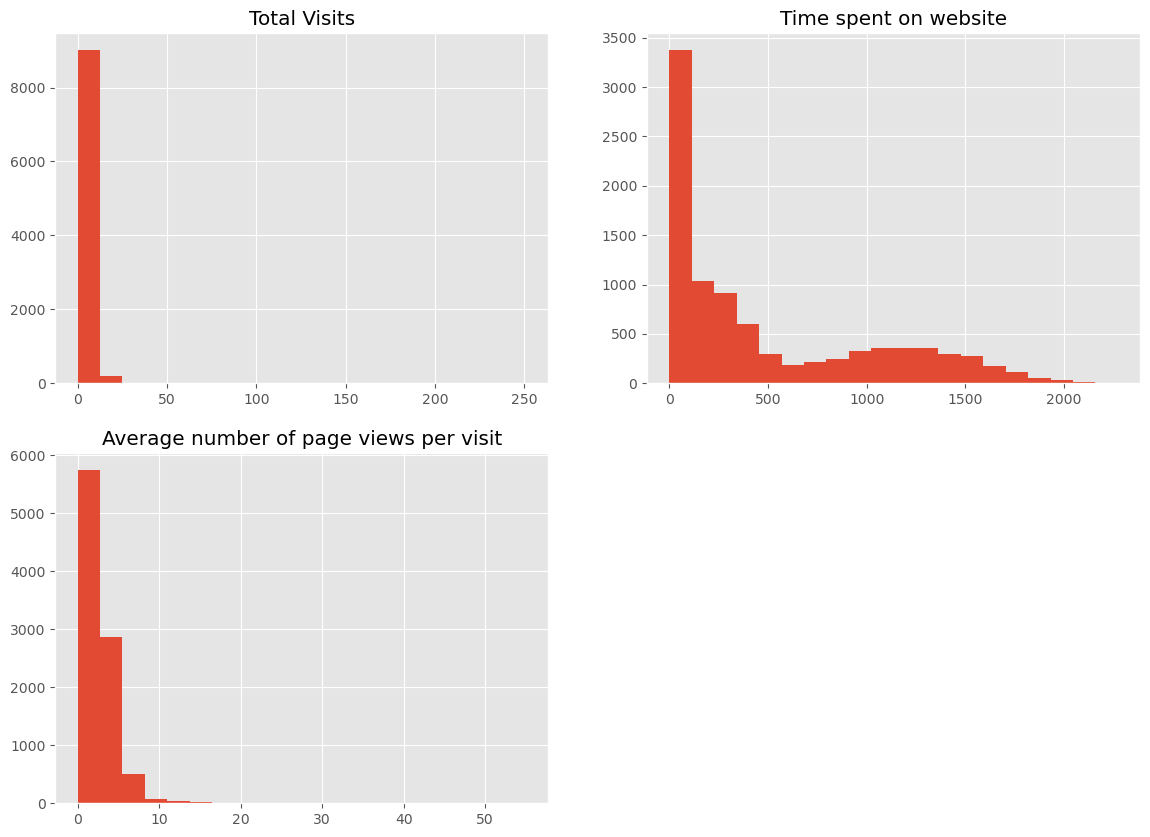

In [77]:
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(lead_data.TotalVisits, bins = 20)
plt.title('Total Visits')

plt.subplot(2, 2, 2)
plt.hist(lead_data.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(lead_data['Page Views Per Visit'], bins = 20)
plt.title('Average number of page views per visit')

plt.show()

#### Observation:
    1) Data has high peaks
    2) Data looks skewed

<AxesSubplot:>

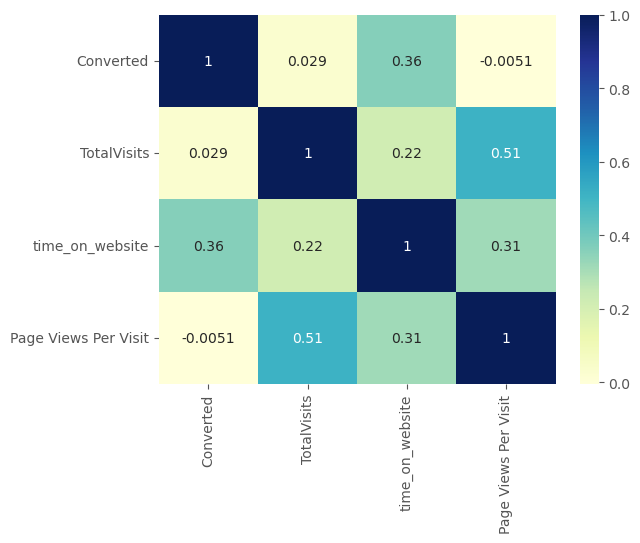

In [78]:
# Correlation matrix
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot = True)

### Observations:
    1) Time spent on website has strong and positive relation with target variable 'Converted'
    2) Page views per visit has week and negative relation with target variable 'Converted'

#### Checking for Outliers

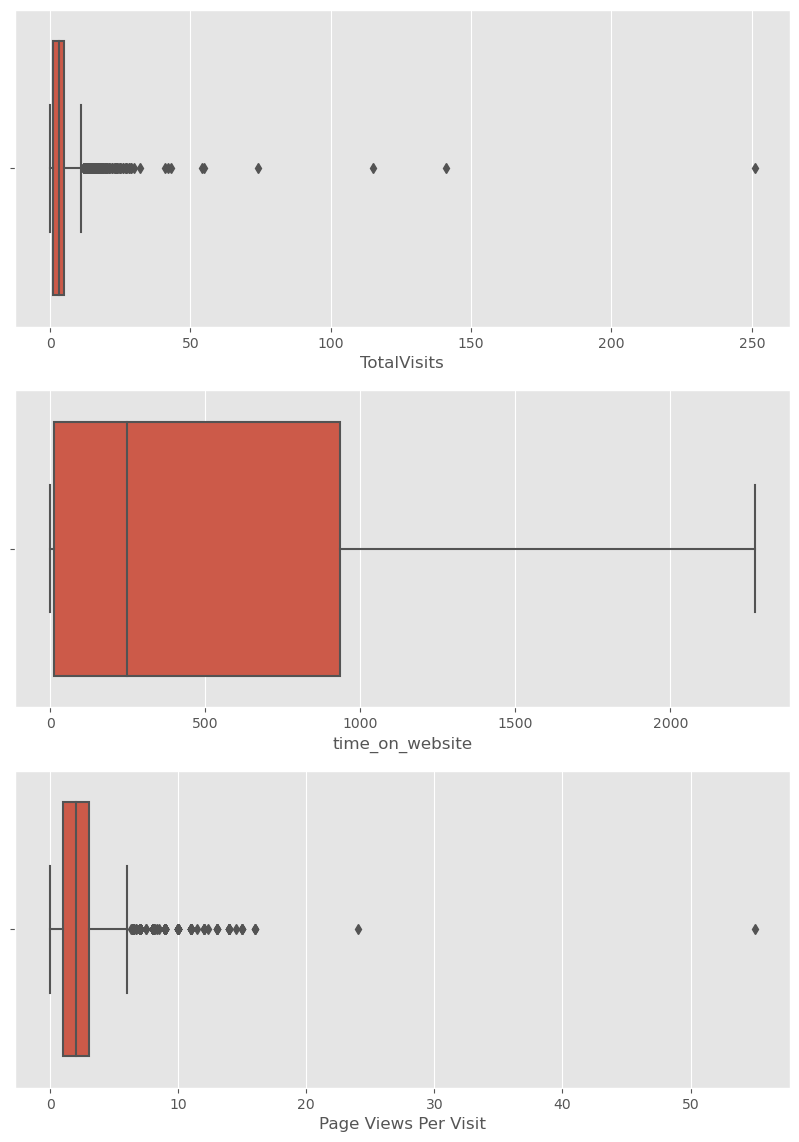

In [79]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(lead_data.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(lead_data.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

### Observations:
    1) Look at 1st and 3rd box plots and the statistics, there are upper bound outliers in both total_visits and page_views_per_visit columns. 
    2) We can also see that the data can be capped at 99 percentile.
    3) We are not going to treat Outliers as of yet.

## Data Preparation

### Dummy Variables

In [80]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,City,mastering_interview
0,API,Olark Chat,No,0,0.00,0,0.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
1,API,Organic Search,No,0,5.00,674,2.50,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,No


In [81]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lead Origin              9240 non-null   object 
 1   Lead Source              9240 non-null   object 
 2   Do Not Email             9240 non-null   object 
 3   Converted                9240 non-null   int64  
 4   TotalVisits              9240 non-null   float64
 5   time_on_website          9240 non-null   int64  
 6   Page Views Per Visit     9240 non-null   float64
 7   Country                  9240 non-null   object 
 8   Specialization           9240 non-null   object 
 9   occupation               9240 non-null   object 
 10  course_selection_reason  9240 non-null   object 
 11  City                     9240 non-null   object 
 12  mastering_interview      9240 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 938.6+ KB


In [82]:
bin_cols = ['Do Not Email', 'mastering_interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[bin_cols] = lead_data[bin_cols].apply(binary_map)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,City,mastering_interview
0,API,Olark Chat,0,0,0.00,0,0.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0
1,API,Organic Search,0,0,5.00,674,2.50,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0


#### Creating dummy variable for categorical columns

In [83]:
cat_cols = ['Lead Origin', 'Lead Source', 'Country', 'Specialization', 'occupation', 'course_selection_reason',
           'City']
dummy = pd.get_dummies(lead_data[cat_cols], drop_first = True)

# Adding the results to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [84]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,Country,Specialization,occupation,course_selection_reason,City,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.00,0,0.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.00,674,2.50,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,India,Operations Management,Unemployed,Better Career Prospects,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [85]:
# droping columns for which dummy's has been created
lead_data.drop(cat_cols, axis=1, inplace=True)

In [86]:
lead_data.head()

,Do Not Email,Converted,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.00,1532,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,2.00,1428,1.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [87]:
lead_data.columns

Index(['Do Not Email', 'Converted', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'mastering_interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Canada', 'Country_China',
       'Country_Denmark', 'Country_France', 'Country_Germany', 'Co

#### Test and Train data split

In [88]:
X=lead_data.drop('Converted', axis=1)
y=lead_data['Converted']

In [93]:
X.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,2.00,1532,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2.00,1428,1.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [94]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [95]:
X_train.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3112,0,2.00,412,2.00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8413,0,5.00,1531,5.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2961,0,3.00,1248,1.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24,0,6.00,1137,1.50,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2740,0,3.00,1003,3.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


#### Since data of below columns are of different units, lets scale them up, using minmax scalar
    TotalVisits
    time_on_website'
    Page Views Per Visit

In [96]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'time_on_website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'time_on_website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3112,0,0.01,0.18,0.08,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8413,0,0.02,0.68,0.21,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2961,0,0.01,0.55,0.04,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
24,0,0.02,0.50,0.06,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2740,0,0.01,0.45,0.12,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


### Model Building
    Since number of feature is more let go with RFE method first and then we will use manual method to further fine tune the model

In [103]:
# Initialize model
lr = LogisticRegression()

In [104]:
# Lets select 1st 15 features to start with
rfe = RFE(lr, step=15)
rfe = rfe.fit(X_train, y_train)

In [105]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('time_on_website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('mastering_interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 4),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', True, 1),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', True, 1),
 ('Lead Source_testone', True, 1),
 ('Lead Source_w

In [106]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Country_Australia', 'Country_France', 'Country_Germany',
       'Country_Italy', 'Country_Nigeria', 'Country_Oman', 'Country_Qatar',
       'Country_Singapore', 'Country_South Africa', 'Country_Sweden',
       'Country_unknown', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Operations Management',
       'Specialization_Retail Management', 'occupation_Housewife',
       'occupation_Other', 'occu

#### Assessing the model with StatsModels

In [107]:
# 1st X_train with only columns provided by RFE
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           44
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2989.0
Date:                Mon, 17 Apr 2023   Deviance:                       5977.9
Time:                        00:39:54   Pearson chi2:                 7.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3377
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.9825      1.231     -0.798      0.425      -3.394       1.429
Do Not Email                                         -1.4174      0.158     -8.947      0.000      -1.728      -1.107
TotalVisits                                           5.0584      2.127      2.378      0.017       0.890       9.227
time_on_website                                       4.4621      0.156     28.663      0.000       4.157       4.767
Page Views Per Visit                                 -0.5657      0.530     -1.067      0.286      -1.604       0.473
Lead Origin_Landing Page Submission                  -0.6155      0.109     -5.651      0.000      -0.829      -0.402
Lead Origin_Lead Add Form                             4.3570      0.577      7.550      0.000       3.226       5.488
Lead Source_Facebook                                 -0.2826      0.475     -0.595      0.552      -1.214       0.649
Lead Source_Live Chat                                21.2970   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                   23.6867   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                0.6740      0.121      5.591      0.000       0.438       0.910
Lead Source_Press_Release                           -22.5229   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                -0.8112      0.602     -1.348      0.178      -1.991       0.369
Lead Source_Referral Sites                           -0.5226      0.312     -1.674      0.094      -1.134       0.089
Lead Source_WeLearn                                  23.0297   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                          2.2274      1.156      1.926      0.054      -0.039       4.494
Lead Source_bing                                    -21.8720   3.48e+04     -0.001      0.999   -6.82e+04    6.81e+04
Lead Source_blog                                    -22.8289   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_testone                                 -22.4082   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearnblog_Home                        -22.6399   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Country_Australia                                   -23.2055   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Country_France                                        1.0584      1.220      0.868      0.386      -1.332       3.449
Country_Germany                                      23.1196   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy  

In [108]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22180034, 0.72125951, 0.99236079, 0.70859583, 0.57076776,
       0.19561076, 0.19561076, 0.25268586, 0.69533897, 0.11761613])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.22
1,1,0.72
2,1,0.99
3,1,0.71
4,0,0.57


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.22,0
1,1,0.72,1
2,1,0.99,1
3,1,0.71,1
4,0,0.57,1


In [113]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3493  461]
 [ 881 1633]]


In [114]:
# Predicted     not_Converted    Converted
# Actual
# Converted        3493          461
# Converted         881          881  

In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7925170068027211


#### The accuracy of this model is 79.25%.
#### Now lets check the variance inflation factor among the features and fine tune the model further and check accuracy

In [118]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,15.87
37,occupation_Unemployed,14.57
11,Lead Source_Reference,12.66
4,Lead Origin_Landing Page Submission,6.07
3,Page Views Per Visit,4.47
32,Specialization_Operations Management,3.82
14,Lead Source_Welingak Website,3.73
9,Lead Source_Olark Chat,2.71
2,time_on_website,2.29
38,occupation_Working Professional,2.22


#### Below features has very high VIF so lets drop them one-by-one and re-check VIF again
    Lead Origin_Lead Add Form
    occupation_Unemployed
    Lead Source_Reference

In [119]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'TotalVisits', 'time_on_website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Country_Australia', 'Country_France',
       'Country_Germany', 'Country_Italy', 'Country_Nigeria', 'Country_Oman',
       'Country_Qatar', 'Country_Singapore', 'Country_South Africa',
       'Country_Sweden', 'Country_unknown',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Operations Management',
       'Specialization_Retail Management', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_

In [120]:
X_train_rfe_2 = X_train[col]

#### Check VIF again

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,occupation_Unemployed,14.24
4,Lead Origin_Landing Page Submission,5.99
3,Page Views Per Visit,4.44
31,Specialization_Operations Management,3.82
8,Lead Source_Olark Chat,2.66
2,time_on_website,2.29
37,occupation_Working Professional,2.18
1,TotalVisits,1.92
10,Lead Source_Reference,1.66
35,occupation_Student,1.36


#### Observation:
    The VIF of feature 'occupation_Unemployed' remains same as before
    The high VIF feature 'Lead Source_Reference' is now do not have high VIF after droping feature 'Lead Origin_Lead Add Form'
    
Now let drop the feature 'occupation_Unemployed' as it has high VIF as well and re-check VIF amongs the features

In [122]:
col = col.drop('occupation_Unemployed', 1)
X_train_rfe_3 = X_train[col]
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.85
4,Lead Origin_Landing Page Submission,3.28
31,Specialization_Operations Management,2.21
2,time_on_website,2.07
1,TotalVisits,1.91
8,Lead Source_Olark Chat,1.78
36,occupation_Working Professional,1.21
41,City_Thane & Outskirts,1.17
38,City_Other Cities,1.17
10,Lead Source_Reference,1.17


#### Observation:
    Now all the feature's VIF is below threshold limit 5. Hence VIF is under control now

#### Let's rebuild the model using this new set of features and check the p-values 

In [123]:
X_train_sm3 = sm.add_constant(X_train_rfe_3)
logm3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6425
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3035.2
Date:                Mon, 17 Apr 2023   Deviance:                       6070.4
Time:                        01:02:59   Pearson chi2:                 7.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3282
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.2489      0.127     -9.797      0.000      -1.499      -0.999
Do Not Email                                         -1.2529      0.151     -8.291      0.000      -1.549      -0.957
TotalVisits                                           4.5760      2.022      2.263      0.024       0.612       8.540
time_on_website                                       4.3337      0.153     28.309      0.000       4.034       4.634
Page Views Per Visit                                 -0.9646      0.522     -1.847      0.065      -1.988       0.059
Lead Origin_Landing Page Submission                  -0.7190      0.107     -6.694      0.000      -0.929      -0.508
Lead Source_Facebook                                 -0.4291      0.471     -0.911      0.362      -1.352       0.494
Lead Source_Live Chat                                25.4618   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                   23.6859   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                0.4844      0.117      4.130      0.000       0.255       0.714
Lead Source_Press_Release                           -22.4900   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                 3.3387      0.221     15.123      0.000       2.906       3.771
Lead Source_Referral Sites                           -0.5913      0.309     -1.913      0.056      -1.197       0.014
Lead Source_WeLearn                                  23.0219   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                          6.3608      1.013      6.279      0.000       4.375       8.346
Lead Source_bing                                    -22.0006   3.47e+04     -0.001      0.999    -6.8e+04    6.79e+04
Lead Source_blog                                    -22.8126   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_testone                                 -22.4522   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearnblog_Home                        -22.6882   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Country_Australia                                   -23.2108   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Country_France                                        0.9653      1.202      0.803      0.422      -1.391       3.321
Country_Germany                                      23.1902   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy                                       -23.3125   4.73e+04     -0.000      1.000   -9.28e+04    9.28e+04
Country_Nigeria

#### Observation: Below mentioned features has high p-value of 1 or close to 1 which is way more then limit of 0.05
    Lead Source_Live Chat
    Lead Source_NC_EDM
    Lead Source_Press_Release
    Lead Source_WeLearn
    Lead Source_bing
    Lead Source_blog
    Lead Source_testone
    Lead Source_welearnblog_Home
    Country_Australia
    Country_Germany
    Country_Italy
    Country_Nigeria
    Country_Sweden
    Country_unknown
    occupation_Housewife
    occupation_Other
    course_selection_reason_Flexibility & Convenience

    Country_Germany
    Country_France
    Lead Source_Facebook
    Country_Qatar
    Country_Oman
    Country_Singapore
    Country_South
    Specialization_Healthcare Management
    Specialization_Hospitality Management
    Specialization_Retail Management
    occupation_Student
    City_Other Cities  
    
    
Lets drop these columns

#### Observation: Actully features related to country is not looking relevent, this we could have dropped earlier also

In [124]:
col = col.drop(['Lead Source_Live Chat','Lead Source_NC_EDM','Lead Source_Press_Release','Lead Source_WeLearn','Lead Source_bing','Lead Source_blog','Lead Source_testone','Lead Source_welearnblog_Home','Country_Australia','Country_Italy','Country_Nigeria','Country_Sweden','Country_unknown','occupation_Housewife','occupation_Other','course_selection_reason_Flexibility & Convenience'], 1)

In [125]:
X_train_rfe_4 = X_train[col]
X_train_sm4 = sm.add_constant(X_train_rfe_4)
logm4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3053.7
Date:                Mon, 17 Apr 2023   Deviance:                       6107.3
Time:                        01:11:52   Pearson chi2:                 7.76e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3243
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2337      0.127     -9.738      0.000      -1.482      -0.985
Do Not Email                             -1.2574      0.151     -8.340      0.000      -1.553      -0.962
TotalVisits                               4.6092      2.031      2.269      0.023       0.628       8.590
time_on_website                           4.3221      0.153     28.335      0.000       4.023       4.621
Page Views Per Visit                     -1.0570      0.517     -2.043      0.041      -2.071      -0.043
Lead Origin_Landing Page Submission      -0.7158      0.107     -6.694      0.000      -0.925      -0.506
Lead Source_Facebook                     -0.4320      0.470     -0.918      0.359      -1.354       0.490
Lead Source_Olark Chat                    0.4719      0.117      4.043      0.000       0.243       0.701
Lead Source_Reference                     3.2966      0.218     15.122      0.000       2.869       3.724
Lead Source_Referral Sites               -0.5878      0.308     -1.905      0.057      -1.192       0.017
Lead Source_Welingak Website              6.3482      1.013      6.267      0.000       4.363       8.334
Country_France                            0.9729      1.200      0.811      0.418      -1.380       3.325
Country_Germany                          20.2203   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Country_Oman                              1.6020      1.276      1.255      0.209      -0.899       4.103
Country_Qatar                             0.5109      1.289      0.396      0.692      -2.016       3.038
Country_Singapore                         1.2213      0.806      1.515      0.130      -0.359       2.802
Country_South Africa                      1.0944      1.429      0.766      0.444      -1.707       3.895
Specialization_Healthcare Management      0.2291      0.259      0.884      0.377      -0.279       0.737
Specialization_Hospitality Management    -0.3867      0.305     -1.269      0.204      -0.984       0.210
Specialization_Operations Management     -0.6478      0.097     -6.685      0.000      -0.838      -0.458
Specialization_Retail Management         -0.2436      0.318     -0.765      0.444      -0.868       0.380
occupation_Student                        0.2738      0.200      1.367      0.172      -0.119       0.666
occupation_Working Professional           2.7235      0.177     15.353      0.000       2.376       3.071
City_Other Cities                         0.1221      0.126      0.972      0.331      -0.124       0.368
City_Other Cities of Maharashtra          0.4194      0.147      2.857      0.004       0.132       0.707
City_Other Metro Cities                   0.3610      0.163      2.210      0.027       0.041       0.681
City_Than

In [127]:
col = col.drop(['Country_Germany','Country_France','Lead Source_Facebook','Country_Qatar','Country_Oman','Country_Singapore','Country_South Africa','Specialization_Healthcare Management','Specialization_Hospitality Management','Specialization_Retail Management','occupation_Student','City_Other Cities'], 1)
X_train_rfe_5 = X_train[col]
X_train_sm5 = sm.add_constant(X_train_rfe_5)
logm5 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3060.3
Date:                Mon, 17 Apr 2023   Deviance:                       6120.6
Time:                        01:20:02   Pearson chi2:                 7.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3230
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.2245      0.124     -9.844      0.000      -1.468      -0.981
Do Not Email                            -1.2620      0.151     -8.365      0.000      -1.558      -0.966
TotalVisits                              4.6886      2.053      2.284      0.022       0.665       8.712
time_on_website                          4.3134      0.152     28.361      0.000       4.015       4.611
Page Views Per Visit                    -1.0490      0.516     -2.031      0.042      -2.061      -0.037
Lead Origin_Landing Page Submission     -0.6984      0.106     -6.613      0.000      -0.905      -0.491
Lead Source_Olark Chat                   0.4798      0.115      4.156      0.000       0.254       0.706
Lead Source_Reference                    3.3019      0.217     15.203      0.000       2.876       3.728
Lead Source_Referral Sites              -0.5691      0.307     -1.854      0.064      -1.171       0.033
Lead Source_Welingak Website             6.3454      1.013      6.265      0.000       4.360       8.330
Specialization_Operations Management    -0.6505      0.096     -6.797      0.000      -0.838      -0.463
occupation_Working Professional          2.7203      0.177     15.361      0.000       2.373       3.067
City_Other Cities of Maharashtra         0.3832      0.144      2.656      0.008       0.100       0.666
City_Other Metro Cities                  0.3606      0.161      2.236      0.025       0.045       0.677
City_Thane & Outskirts                   0.2593      0.118      2.198      0.028       0.028       0.490
========================================================================================================
"""

#### Let's recheck VIF, just to cross check if any impact of droping features

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,3.80
4,Lead Origin_Landing Page Submission,3.10
9,Specialization_Operations Management,2.14
2,time_on_website,2.05
1,TotalVisits,1.91
5,Lead Source_Olark Chat,1.74
10,occupation_Working Professional,1.20
6,Lead Source_Reference,1.15
13,City_Thane & Outskirts,1.14
0,Do Not Email,1.10


#### VIF still looks good

#### Lets check accuracy after dropping these many features

In [129]:
y_train_pred = res.predict(X_train_sm5)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3491  463]
 [ 915 1599]]


In [130]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7869511440940012


### The accuracy of new model is still good, it has come down from 79.25% to 78.7% which is not much of a drop

#### Now lets drop few more features with high p-values and see if model accuracy drop significantly, dopping below columns
    Lead Source_Referral Sites
    City_Other Metro Cities
    City_Thane & Outskirts
    City_Other Cities of Maharashtra

#### The feature 'Page Views Per Visit' also has high p-value as compare to features mentioned above, but as per the business domain this feature is relevent, hence not dropping it

In [131]:
col = col.drop(['Lead Source_Referral Sites','City_Other Metro Cities','City_Thane & Outskirts','City_Other Cities of Maharashtra'], 1)
X_train_rfe_6 = X_train[col]
X_train_sm6 = sm.add_constant(X_train_rfe_6)
logm5 = sm.GLM(y_train, X_train_sm6, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3069.2
Date:                Mon, 17 Apr 2023   Deviance:                       6138.3
Time:                        01:29:52   Pearson chi2:                 7.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3211
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.2063      0.124     -9.755      0.000      -1.449      -0.964
Do Not Email                            -1.2662      0.151     -8.399      0.000      -1.562      -0.971
TotalVisits                              4.4949      2.029      2.215      0.027       0.518       8.472
time_on_website                          4.3171      0.152     28.449      0.000       4.020       4.615
Page Views Per Visit                    -1.0478      0.514     -2.040      0.041      -2.054      -0.041
Lead Origin_Landing Page Submission     -0.6249      0.104     -6.016      0.000      -0.828      -0.421
Lead Source_Olark Chat                   0.4949      0.115      4.311      0.000       0.270       0.720
Lead Source_Reference                    3.3357      0.217     15.391      0.000       2.911       3.760
Lead Source_Welingak Website             6.3640      1.013      6.284      0.000       4.379       8.349
Specialization_Operations Management    -0.6769      0.095     -7.091      0.000      -0.864      -0.490
occupation_Working Professional          2.7179      0.177     15.342      0.000       2.371       3.065
========================================================================================================
"""

In [133]:
#### Lets check accuracy after dropping these many features
y_train_pred = res.predict(X_train_sm6)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3500  454]
 [ 900 1614]]


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7906617192331478


#### Observation: Strange but the accuracy has improved to 79.1% from 78.7%, so now we can finalize this as our final model
### Final model accuracy = 79.1%

## Model Evaluation

In [135]:
y_train_pred = res.predict(X_train_sm6)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3500  454]
 [ 900 1614]]
0.7906617192331478


#### ## Metrics beyond simply accuracy

In [136]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [139]:
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

sensitivity= 64.2 %
specificity= 88.52 %


#### With the current cut off as 0.5 we have around 79.1% accuracy, sensitivity of around 64.2% and specificity of around 88.52%.

### Optimise Cut off (ROC Curve)
    An ROC curve demonstrates several things:
        It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
        The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
        The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [140]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


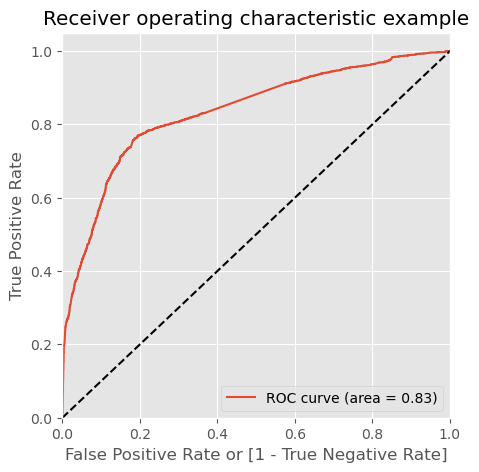

In [143]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Area under the curve is 0.83, which a good value

#### Creating columns with different probability cutoffs 

In [144]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.25,0,1,1,1,0,0,0,0,0,0,0
1,1,0.73,1,1,1,1,1,1,1,1,1,0,0
2,1,0.99,1,1,1,1,1,1,1,1,1,1,1
3,1,0.73,1,1,1,1,1,1,1,1,1,0,0
4,0,0.50,1,1,1,1,1,1,1,0,0,0,0


In [145]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.00,0.00,0.39,1.00,0.00
0.10,0.10,0.45,0.99,0.10
0.20,0.20,0.71,0.83,0.63
0.30,0.30,0.79,0.77,0.80
0.40,0.40,0.79,0.70,0.85
0.50,0.50,0.79,0.64,0.89
0.60,0.60,0.77,0.54,0.91
0.70,0.70,0.75,0.43,0.95
0.80,0.80,0.73,0.34,0.97
0.90,0.90,0.69,0.20,0.99


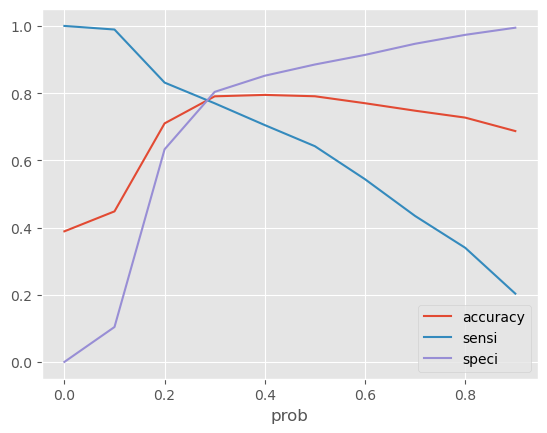

In [146]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### the graph shows that the optimal cut off is at 0.30.
##### let's predict with this cutoff value

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.25,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.73,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.99,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.73,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.50,1,1,1,1,1,1,1,0,0,0,0,1


In [149]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3500  454]
 [ 900 1614]]
0.7906617192331478


In [150]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

Accuracy= 79.07 %
sensitivity= 64.2 %
specificity= 88.52 %


### With the current cut off as 0.3 we have around 79.07% accuracy, sensitivity of around 64.2% and specificity of around 88.52%

### Prediction on Test set

In [154]:
# Scaling (only the transform not the fit) on test set
#X_trn, X_test, y_trn, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)
X_test[['TotalVisits', 'time_on_website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'time_on_website', 'Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,mastering_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,course_selection_reason_Flexibility & Convenience,course_selection_reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
567,0,0.03,0.15,0.07,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2303,0,0.02,0.68,0.04,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1523,0,0.03,0.59,0.05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6923,0,0.04,0.08,0.09,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7841,0,0.02,0.31,0.04,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [155]:
# Selecting only those columns for test set, which are available in train set
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Operations Management,occupation_Working Professional
567,0,0.03,0.15,0.07,1,0,0,0,0,0
2303,0,0.02,0.68,0.04,1,0,0,0,0,0
1523,0,0.03,0.59,0.05,0,0,0,0,0,0
6923,0,0.04,0.08,0.09,1,0,0,0,0,0
7841,0,0.02,0.31,0.04,1,0,0,0,0,0


In [157]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,TotalVisits,time_on_website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Operations Management,occupation_Working Professional
567,1.00,0,0.03,0.15,0.07,1,0,0,0,0,0
2303,1.00,0,0.02,0.68,0.04,1,0,0,0,0,0
1523,1.00,0,0.03,0.59,0.05,0,0,0,0,0,0
6923,1.00,0,0.04,0.08,0.09,1,0,0,0,0,0
7841,1.00,0,0.02,0.31,0.04,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9124,1.00,0,0.02,0.12,0.02,0,0,0,0,1,0
1049,1.00,0,0.07,0.70,0.07,0,0,0,0,1,0
7778,1.00,0,0.02,0.13,0.04,1,0,0,0,0,0
6432,1.00,0,0.00,0.00,0.00,0,1,0,0,1,0


In [158]:
# Prdicting

y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.25
1,0,0.76
2,0,0.80
3,0,0.20
4,0,0.39


In [159]:
# Making prediction using cut off 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final

,Converted,Converted_Prob,final_predicted
0,0,0.25,0
1,0,0.76,1
2,0,0.80,1
3,0,0.20,0
4,0,0.39,1
...,...,...,...
2767,0,0.21,0
2768,0,0.80,1
2769,0,0.23,0
2770,0,0.20,0


In [162]:
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

0.7893217893217893


array([[1352,  373],
       [ 211,  836]])

In [164]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

Accuracy= 78.93 %
sensitivity= 79.85 %
specificity= 78.38 %


#### With the current cut off as 0.3 we have accuracy=78.93%, sensitivity=79.85% and specificity of around 78.38% for test dataset

### Precision-Recall

#### Precision-Recall calculation for Train dataset

In [166]:
# Precision = TP / TP + FP
print("Precision(Train)=", round(confusion[1,1]/(confusion[0,1]+confusion[1,1])*100,2), "%")
#Recall = TP / TP + FN
print("Recall(Train)=", round(confusion[1,1]/(confusion[1,0]+confusion[1,1])*100,2),"%")

Precision(Train)= 78.05 %
Recall(Train)= 64.2 %


#### Precision-Recall trade-off

In [167]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

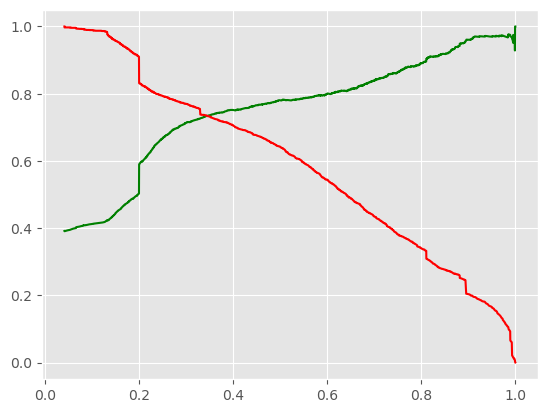

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The Precision-Recall curve shows that the cut off is at 0.35

In [169]:
# lets predict with ths cut off value
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

print("Accuracy=",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

[[3500  454]
 [ 900 1614]]
0.7906617192331478
Accuracy= 79.07 %
sensitivity= 64.2 %
specificity= 88.52 %


### With the current cut off as 0.35 we have around 79.07% accuracy, sensitivity of around 64.2% and specificity of around 88.52%
#### Observation: There is no change in any of these parameters when we changed cutoff from 0.3 to 0.35

#### Prediction on test data with this new cutoff value of 0.35

In [171]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]
print("######### Test Data set  ########")
print("Accuracy=",round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100,2), "%")
# Calculating the sensitivity
print("sensitivity=", round(TP*100/(TP+FN), 2), "%")
# Calculating the specificity
print("specificity=", round(TN*100/(TN+FP), 2), "%")

######### Test Data set  ########
Accuracy= 79.11 %
sensitivity= 74.88 %
specificity= 81.68 %


#### With the current cut off as 0.35 we have accuracy=79.22%, sensitivity=74.88% and specificity of around 81.68% for test dataset

#### Observation: There is slight improvement in Accuracy and Specificity values whereas significant drop in Sensitivity value with this new cutoff of 0.35 on test data set

## Conclusion : Below are the list of parameters/feature which help the predicting the Course sales 
    Do Not Email
    TotalVisits
    time_on_website
    Page Views Per Visit
    Lead Origin_Landing Page Submission
    Lead Source_Olark Chat
    Lead Source_Reference
    Lead Source_Welingak Website
    Specialization_Operations Management
    occupation_Working Professional